# Analyser les ventes d'un site de e-commerce spécialisé dans les livres

L'entreprise pour qui vous travaillez souhaite analyser les ventes de son site et mieux connaitre ses clients, ainsi que le détail des ventes de ses produits

Vous pourrez télécharger l'ensemble des données [via ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/dataset_P4.zip)  Les données que vous avez à disposition :   
* les ventes (appelées “Transactions”)  
* la liste des clients  
* la liste des produits.

## Nettoyage des données

Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

Pour vous guider, voici quelques choses à explorer :  
* l'évolution du Chiffre d'Affaire de manière mensuelle
* Tester les différentes jointures possibles entre les tables (pour rappel, il en existe [4 types](http://python-simple.com/python-pandas/concatenations-joins-dataframe.php ))
* Des valeurs abérrantes sont présentes dans la table *transaction*, identifiez-les et supprimez-les de votre étude.
* Regarder le nombre de transaction par client ou le nombre de CA par client

Vous aurez donc des choix à faire : imputation de valeurs manquantes, gestions de valeurs atypiques etc.

A noter : enregistrer vos données nettoyées dans un fichier csv, nous le réutiliserons ensuite pour étudier les corrélations

In [1]:
import pandas as pd

In [234]:
df_transaction = pd.read_csv('./dataset/transactions.csv')
del df_transaction

In [235]:
from os import listdir
from pathlib import Path
directory_path = './dataset/'
listdir_data = listdir(directory_path)
listdir_data

['customers.csv', 'products.csv', 'transactions.csv']

Recommençons.

In [114]:
del df_transaction

In [278]:
# fetch virgin csv using the method listdir from os library. Then build a list of the three df_

df_customers = pd.read_csv(directory_path + listdir_data[0])
df_products = pd.read_csv(directory_path + listdir_data[1])
df_transactions =  pd.read_csv(directory_path + listdir_data[2])
list_df_datas = [df_customers,df_products,df_transactions]

In [112]:
# tentative de récupérer le nom d'une variable. Fail : df_customers.__name__ 

In [123]:
# for df in list_df_datas :  {fail --> print(globals().items()[0])} ,  print(df.describe()), print('')

Il y a un prix négatif dans df_products, ils n'ont pas de sens => suppresion

In [239]:
for df in list_df_datas : print(df.describe())

             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000
       id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855


In [263]:
df_products[df_products['price']<0] # Dans df_products, montrer les produits dont le prix est inférieur à 0

,id_prod,price,categ
731,T_0,-1.0,0


In [280]:
#Je fais ça pour que cette méthode soit identique s'il y a plusieurs occurences. Même si ici, il n'y en a qu'une...
list_to_remove = df_products[df_products['price']<0]


,id_prod,price,categ
731,T_0,-1.0,0


In [301]:
list_to_remove.id_prod

731    T_0
Name: id_prod, dtype: object

In [265]:
# tentative d'utiliser la méthod insert
#for row in df_products[df_products['price']<0] : list_id_prod.insert(0,row[row.index])

In [281]:
 # c'est là que c'est puissant d'utiliser une liste puisqu'on drop tout d'un coup
df_products = df_products.drop(list_to_remove.index)

En réalité l'idée était de récupérer l'id_prod pour le supprimer facilement de la table transaction.

In [282]:
df_products[df_products['price']<0] # ça a marché

,id_prod,price,categ


In [283]:
listdir_data

['customers.csv', 'products.csv', 'transactions.csv']

In [347]:
list_df_datas[1] = df_products
list_df_datas[1][df_products['price']<0]

,id_prod,price,categ


In [288]:
for df in list_df_datas : print(df.isna().sum()), print('') # il y a-t-il des valeurs non renseignées ?

client_id    0
sex          0
birth        0
dtype: int64

id_prod    0
price      0
categ      0
dtype: int64

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64



In [290]:
for df in list_df_datas : print(df.columns), print(df.shape), print('')

Index(['client_id', 'sex', 'birth'], dtype='object')
(8623, 3)

Index(['id_prod', 'price', 'categ'], dtype='object')
(3286, 3)

Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')
(337016, 4)



Un de moins 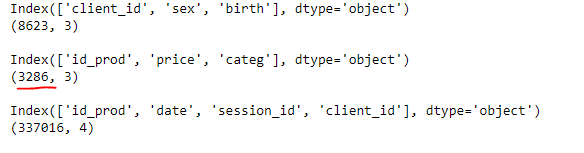


In [304]:
df_transactions[df_transactions['id_prod'] == 'T_0'].count()

id_prod       200
date          200
session_id    200
client_id     200
dtype: int64

Il y a 200 transaction avec ce produit au prix négatif... Une tentative d'arnaque ? 

In [350]:
transaction_to_remove = df_transactions[df_transactions['id_prod'] == 'T_0']
transaction_to_remove

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [311]:
df_transactions[df_transactions['id_prod'] == 'T_0'].describe()

,id_prod,date,session_id,client_id
count,200,200,200,200
unique,1,39,1,2
top,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
freq,200,13,200,106


In [391]:
transaction_to_remove = df_transactions[df_transactions['id_prod'] == 'T_0']
customer1ToRemove = df_customers[df_customers['client_id'] == ('ct_1')]
customer2ToRemove = df_customers[df_customers['client_id'] == ('ct_0')]

In [393]:
customer2ToRemove

,client_id,sex,birth
2735,ct_0,f,2001


In [326]:

print(df_transactions[(df_transactions['client_id'] == ('ct_1'))].count()),
df_transactions[(df_transactions['client_id'] == ('ct_0'))].count()

id_prod       94
date          94
session_id    94
client_id     94
dtype: int64


id_prod       106
date          106
session_id    106
client_id     106
dtype: int64

In [ ]:
print(df_transactions[(df_transactions['client_id'] == ('ct_1'))].count()),
df_transactions[(df_transactions['client_id'] == ('ct_0'))].count()

In [331]:
len(df_transactions[df_transactions['id_prod']== 'T_0']['session_id']=='s_0')

200

In [341]:
max(df_transactions[df_transactions['id_prod'] == 'T_0']['date']), min(df_transactions[df_transactions['id_prod'] == 'T_0']['date'])

('test_2021-03-01 02:30:02.237450', 'test_2021-03-01 02:30:02.237412')

C'est assez étrange, on a 2 clients (ct_0(femme de 2001) et ct_1(homme de 2001) qui ont fait 200 transactions (94 + 106) d'un prix de -1 au cours d'une même session s_0 qui s'est à la même seconde à des dates au format étrange "test_..." entre 'test_2021-03-01 02:30:02.237450', 'test_2021-03-01 02:30:02.237412' soit en 38*10^-6 secondes.

Alors ? Test ou arnaque de 200€ ???? Mystère !

In [353]:
df_transactions = df_transactions.drop(transaction_to_remove.index)

In [354]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


200 lignes de supprimées 
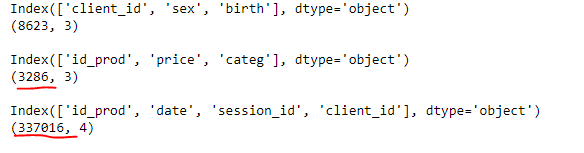

In [356]:
listdir_data

['customers.csv', 'products.csv', 'transactions.csv']

In [358]:
list_df_datas[2] = df_transactions

ct_0 et ct_1 n'ont plus de transaction. Je peux les supprimer de la table client.

In [390]:
customerToRemove.index

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

In [395]:
df_customers = df_customers.drop(customer2ToRemove.index)

KeyError: '[2735] not found in axis'

In [397]:

df_customers = df_customers.drop(customer1ToRemove.index)

In [402]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


Suppression de 2 customers 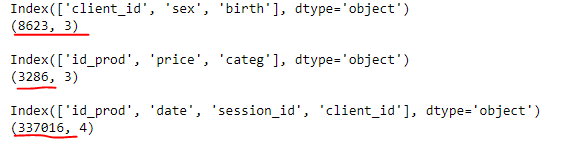


In [406]:
df_transactions.describe()

,id_prod,date,session_id,client_id
count,336816,336816,336816,336816
unique,3265,336816,169194,8600
top,1_369,2021-06-27 21:26:51.719814,s_118668,c_1609
freq,1081,1,14,12855


In [408]:
df_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [409]:
df_customers.describe()

,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [410]:
df_customers[df_customers['client_id'] == 'c_1609']

,client_id,sex,birth
3642,c_1609,m,1980


In [413]:
df_transactions.groupby('client_id')

*si on voulait transformer la date (text) en datetime on utiliserait cette méthode*

`transactions_clean["date"] = pd.to_datetime(transactions_clean['date'])`

On va commencer les merges. À ce stade, la seule qui me semble pertinente serait d'ajouter les prix des produits. On pourra ainsi regarde le prix dépensé par chaque client. 

On pourrait ajouter la table custormer à la table transaction. Mais le genre et l'âge des client n'est pas intéressant pour le moment.

Etat des tables avant : 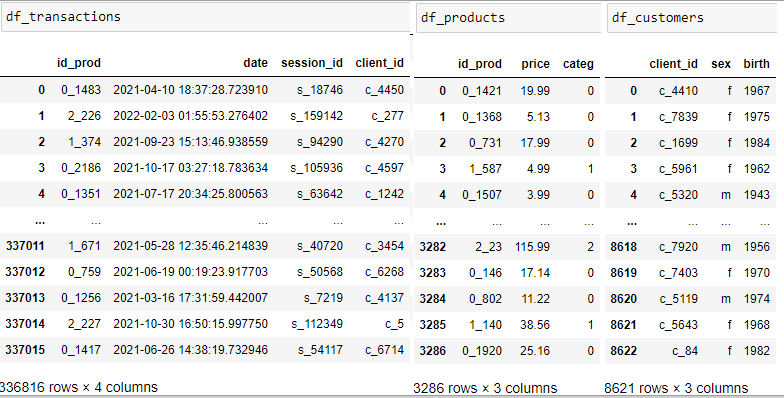

In [461]:
df_transaction_priced_left = pd.merge(left=df_transactions, right=df_products, how='left')
df_transaction_priced_left

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0
...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0


On a donc un tableau de 6 colonnes, logique, 4 de `df_transaction` et 2 de `df_products` (avec la colonne id_prod en moins puisqu'elle fait l'objet d'une jointure).

Vérifions les données de la première ligne. Est-ce que l'id_prod 0_1483 a bien un prix de 4.99 et une categ 0.0 ?

In [424]:
df_products[df_products['id_prod'] == '0_1483']

,id_prod,price,categ
1897,0_1483,4.99,0


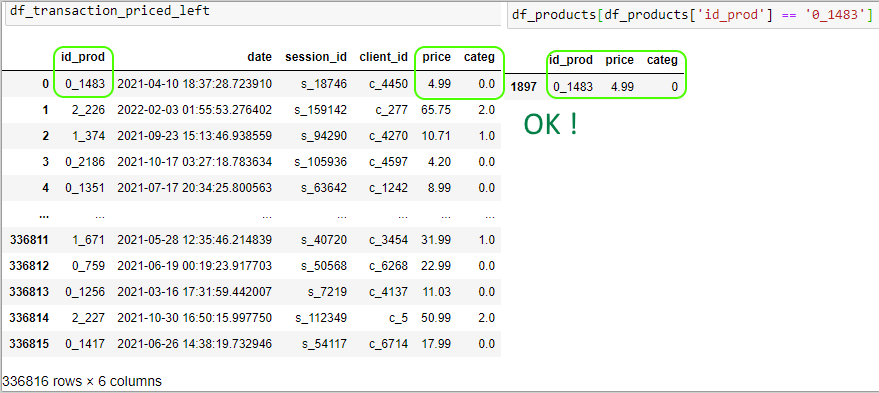

Regardons voir les autres merges

In [447]:
(df_transactions.isna())['session_id'].value_counts()

False    336816
Name: session_id, dtype: int64

Regardons le résultat des 4 types de merge :
`how : {'left', 'right', 'outer', 'inner'}, default 'inner'`

In [460]:
df_transaction_priced_right = pd.merge(left=df_transactions, right=df_products, how='right')
df_transaction_priced_right

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0
...,...,...,...,...,...,...
336730,0_525,NaN,NaN,NaN,2.99,0
336731,2_86,NaN,NaN,NaN,132.36,2
336732,0_299,NaN,NaN,NaN,22.99,0
336733,0_510,NaN,NaN,NaN,23.66,0


Bizarre ces NaN. Il y avait-il des transactions dont les champs étaient NaN ? Ca parait peu probable. Le merge par la droite est allé chercher les transactions correspondantes à chaque produit. Ce qui est bizarre en revanche, c'est que c'est qu'il y a moins de lignes par la droite que par la gauche. Ca voudrait dire qu'il y a eu des transactions pour des produits qui ne sont pas référencés ? Vérifions tout ça.

In [448]:
# Y avait-il des nan dans la table transaction ? 
# count des valeurs nulles dans la colonne `'session_id'`
(df_transactions.isna())['session_id'].value_counts()

False    336816
Name: session_id, dtype: int64

In [449]:
# Y a-t-il des transactions pour des produits non référencés dans la table product ?
df_transactions['id_prod'].value_counts()

1_369     1081
1_417     1062
1_498     1036
1_414     1027
1_425     1013
          ... 
0_1842       1
0_1601       1
2_81         1
0_1858       1
0_1912       1
Name: id_prod, Length: 3265, dtype: int64

In [455]:
#df_transactions[df_transactions['id_prod'] == df_products['id_prod']]
# On verra plus tard

In [459]:
df_transaction_priced_outer = pd.merge(left=df_transactions, right=df_products, how='outer')
df_transaction_priced_outer

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0
...,...,...,...,...,...,...
336833,0_525,NaN,NaN,NaN,2.99,0.0
336834,2_86,NaN,NaN,NaN,132.36,2.0
336835,0_299,NaN,NaN,NaN,22.99,0.0
336836,0_510,NaN,NaN,NaN,23.66,0.0


In [458]:
df_transaction_priced_inner = pd.merge(left=df_transactions, right=df_products, how='inner') #defaut
df_transaction_priced_inner

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0
...,...,...,...,...,...,...
336708,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0
336709,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,149.74,2
336710,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,2.99,0
336711,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,1.38,0


Creation du df librairie sur lequel on va travailler les corrélations

In [465]:
df_transaction_price = pd.merge(
    left=df_transactions, 
    right=df_products, 
    how="left", 
    right_on="id_prod", 
    left_on="id_prod"
)
df_transaction_price

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0
...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0


In [526]:
# un inner qui merge sur le client_id
df_librairie = pd.merge(
    left=df_transaction_price, 
    right=df_customers, 
    how='inner',  #defaut
    left_on='client_id', 
    right_on= 'client_id'
)
df_librairie

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,1_596,2021-09-12 02:11:24.774608,s_88567,c_4450,11.12,1.0,f,1977
2,1_278,2021-09-10 15:09:01.555889,s_87835,c_4450,19.18,1.0,f,1977
3,0_1447,2021-05-25 00:17:56.841054,s_39094,c_4450,4.99,0.0,f,1977
4,0_1357,2021-08-01 10:43:25.039433,s_69919,c_4450,15.99,0.0,f,1977
...,...,...,...,...,...,...,...,...
336811,2_147,2021-12-05 00:31:15.530765,s_129519,c_4540,181.99,2.0,m,2003
336812,2_19,2021-04-03 07:31:36.674313,s_15300,c_5139,69.99,2.0,f,2000
336813,2_37,2021-08-07 07:54:38.543403,s_72476,c_5139,48.99,2.0,f,2000
336814,1_493,2021-06-04 11:35:01.467509,s_43928,c_4679,10.99,1.0,f,1930


In [528]:
df_librairie.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         103
categ         103
sex             0
birth           0
dtype: int64

Il rest 103 Na dans les catégories. Que sont ces catégories ?

In [529]:
df_librairie[df_librairie['categ'].isna()]['price'].mean()

nan

On constate que tous les categ nan ont un prix de 10.646828235274164. Donc les catégories désignent des tranches de prix on pourra lui réattribuer exactement la sienne.

In [534]:
df_librairie[df_librairie['categ']==0.0]['price'].mean()

10.64682823527418

Il se trouve que la moyenne des prix de la catéorie 0.0 est exactement la même.

In [531]:
df_librairie[df_librairie['categ'].isna()]

,id_prod,date,session_id,client_id,price,categ,sex,birth
107,0_2245,2021-04-10 06:15:32.619826,s_18510,c_277,NaN,NaN,f,2000
3572,0_2245,2021-12-10 21:31:18.303110,s_132471,c_3519,NaN,NaN,m,1974
19047,0_2245,2021-04-10 09:22:57.768041,s_18566,c_8240,NaN,NaN,f,1978
19870,0_2245,2021-10-04 21:20:27.540982,s_100047,c_8138,NaN,NaN,f,1984
21193,0_2245,2021-03-28 21:39:14.337424,s_12792,c_2688,NaN,NaN,f,1968
...,...,...,...,...,...,...,...,...
320050,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,NaN,NaN,f,1981
322563,0_2245,2021-08-14 23:34:15.559623,s_75819,c_5157,NaN,NaN,f,1979
323764,0_2245,2021-10-15 09:31:31.539354,s_105069,c_4188,NaN,NaN,f,1935
334259,0_2245,2021-05-20 07:44:21.415061,s_36985,c_1450,NaN,NaN,f,1959


Il se trouve que cela semble correspondre uniquement au produit '0_2245'. Vérifions

In [532]:
df_librairie[df_librairie['categ'].isna()]['id_prod'].value_counts()

0_2245    103
Name: id_prod, dtype: int64

C'est bien ça. Voyons quel est ce produit

In [533]:
df_products[df_products['id_prod']=='0_2245']

,id_prod,price,categ


In [527]:
df_librairie[df_librairie['price']==10.64682823527418]

,id_prod,date,session_id,client_id,price,categ,sex,birth


Il n'est pas référencé. 
C'est étrange 
* qu'il corresponde exactementà la moyenne des prix des produits de catégorie 0.0, **FAUX**
* qu'il semble d'ailleurs être le seul prix à plus de 2 décimales **FAUX**
* et qu'il ne soit pas référencé dans les produits. 

Mais en dehors de cela, ce sont des transactions en tous points normales... Je décide de faire une imputation de la catégorie 0.0 pour chaque NaN après avoir hésité à enlever ces valeurs. C'est ce que le reste de la classe à fait. Mais en situation professionnelle, je pense que je me serai renseigné sur ces valeurs. Cette première option me permet toutefois de les exclure utltérieurement si je le souhaite. 

D'ailleurs, seuls les transactions à ce prix désignent les catégories NaN **FAUX**

Bon, j'allais faire ça:

`df_librairie.categ = df_librairie.categ.fillna(0.0)`
#remplacement des NaN par la moyenne des prix des produits de la catégorie 0
`df_librairie.isna().sum()`

Mais j'ai réalisé que depuis le merge je réfléchissais sur un tableau dans lequel j'avais déjà changé tous les prix des transactions de categ NaN par la moyenne de la catégorie 0.0.

Or, ces transactions sont 
* Peu signifiantes par leur nombre
* Inexploitables sans prix ni catégories. Les imputations n'ont aucune forme de pertinence. 

A la rigueur, je pourrais mettre un prix et sa catégorie en fonction du panier moyen de chaque client qui en à acheté. Mais la tâche est peut-être énorme...

In [579]:
print('max : ',df_librairie[df_librairie.categ.isna()].client_id.value_counts().max(),
      'mean : ', df_librairie[df_librairie.categ.isna()].client_id.value_counts().mean(),
      'sum : ', df_librairie[df_librairie.categ.isna()].client_id.value_counts().sum(),'\n'
      'comparaison au nombre total de transactions = ', 103 / 336816,
      '\nsum of client concerned : ',  len(df_librairie[df_librairie.categ.isna()].client_id.unique())
     )

max :  2 mean :  1.03 sum :  103 
comparaison au nombre total de transactions =  0.000305804949883616 
sum of client concerned :  100


En voyant ces chiffres, j'ai pas trop envie d'inventer des valeurs. Seulement 0,03% des transactions...

In [573]:
import numpy as np

In [585]:
series_customers_nan = df_librairie[df_librairie.categ.isna()].client_id.unique()
print( 'Concernant les clients impliqués dans les transactions nan. Regardons la sum et la moyenne de leurs achats\n')
series_sum_bills = []
series_average_basket = []
for customer in series_customers_nan :
    sum_bill =  df_librairie[df_librairie.client_id == customer].price.sum()
    mean = df_librairie[df_librairie.client_id == customer].price.mean()
    series_sum_bills.insert(0,sum_bill)
    series_average_basket.insert(0,mean)
    print (
      'sum : ',sum_bill,
      'mean : ', mean
    )
print('Pour un total de ',
      'somme des dépenses de ces clients = ', np.sum(series_sum_bills),
     'panier moyen = ', np.mean(series_average_basket)
     )

Concernant les clients impliqués dans les transactions nan. Regardons la sum et la moyenne de leurs achats

Pour un total de  somme des dépenses de ces clients =  228257.00000000003 panier moyen =  14.233605755348881


228257 c'est quand même beaucoup... Voyons voir ce que ça représente.

In [576]:
228257/ df_librairie['price'].sum()

0.03937788968886721

C'est quand même 3% du montant total des transactions. 
Mais, ce sont des clients réguliés pour la plus part, leurs comportements sont quand même connus. Je les enlèves plutôt que de faire des imputations.

In [588]:
df_librairie.shape

(336816, 8)

In [599]:
df_librairie = df_librairie.dropna()
df_librairie.isna().sum(), print('nombre de suppression : ',df_librairie.shape[0] - 336816)

nombre de suppression :  -103


(id_prod       0
 date          0
 session_id    0
 client_id     0
 price         0
 categ         0
 sex           0
 birth         0
 dtype: int64,
 None)

Youpi, c'est fini. On a supprimé les valeurs NaN considérant que c'était mieux que de les remplacer par des valeurs qui auraient été farfelues puisqu'impossible à choisir.

In [600]:
df_librairie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336815
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336713 non-null  object 
 1   date        336713 non-null  object 
 2   session_id  336713 non-null  object 
 3   client_id   336713 non-null  object 
 4   price       336713 non-null  float64
 5   categ       336713 non-null  float64
 6   sex         336713 non-null  object 
 7   birth       336713 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 23.1+ MB


Il faut voir le CA et son évolution, donc ce serait bien de faire un graphique. Pour ça il me faut des dates. Et je ferais la somme des dépenses sur ces dates.

In [610]:
df_librairie['datetime64'] = pd.to_datetime(df_librairie.date)
df_librairie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336815
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336713 non-null  object        
 1   date        336713 non-null  object        
 2   session_id  336713 non-null  object        
 3   client_id   336713 non-null  object        
 4   price       336713 non-null  float64       
 5   categ       336713 non-null  float64       
 6   sex         336713 non-null  object        
 7   birth       336713 non-null  int64         
 8   datetime64  336713 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 25.7+ MB


In [634]:
df_librairie["datetime"],df_librairie["time"]= pd.to_datetime(df_librairie["date"].str.split().str[0]), pd.to_datetime(df_librairie["date"].str.split().str[1])

In [637]:
df_librairie

,id_prod,date,session_id,client_id,price,categ,sex,birth,datetime64,datetime,time
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,2021-04-10 18:37:28.723910,2021-04-10,2020-07-31 18:37:28.723910
1,1_596,2021-09-12 02:11:24.774608,s_88567,c_4450,11.12,1.0,f,1977,2021-09-12 02:11:24.774608,2021-09-12,2020-07-31 02:11:24.774608
2,1_278,2021-09-10 15:09:01.555889,s_87835,c_4450,19.18,1.0,f,1977,2021-09-10 15:09:01.555889,2021-09-10,2020-07-31 15:09:01.555889
3,0_1447,2021-05-25 00:17:56.841054,s_39094,c_4450,4.99,0.0,f,1977,2021-05-25 00:17:56.841054,2021-05-25,2020-07-31 00:17:56.841054
4,0_1357,2021-08-01 10:43:25.039433,s_69919,c_4450,15.99,0.0,f,1977,2021-08-01 10:43:25.039433,2021-08-01,2020-07-31 10:43:25.039433
...,...,...,...,...,...,...,...,...,...,...,...
336811,2_147,2021-12-05 00:31:15.530765,s_129519,c_4540,181.99,2.0,m,2003,2021-12-05 00:31:15.530765,2021-12-05,2020-07-31 00:31:15.530765
336812,2_19,2021-04-03 07:31:36.674313,s_15300,c_5139,69.99,2.0,f,2000,2021-04-03 07:31:36.674313,2021-04-03,2020-07-31 07:31:36.674313
336813,2_37,2021-08-07 07:54:38.543403,s_72476,c_5139,48.99,2.0,f,2000,2021-08-07 07:54:38.543403,2021-08-07,2020-07-31 07:54:38.543403
336814,1_493,2021-06-04 11:35:01.467509,s_43928,c_4679,10.99,1.0,f,1930,2021-06-04 11:35:01.467509,2021-06-04,2020-07-31 11:35:01.467509


In [638]:
df_librairie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336815
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336713 non-null  object        
 1   date        336713 non-null  object        
 2   session_id  336713 non-null  object        
 3   client_id   336713 non-null  object        
 4   price       336713 non-null  float64       
 5   categ       336713 non-null  float64       
 6   sex         336713 non-null  object        
 7   birth       336713 non-null  int64         
 8   datetime64  336713 non-null  datetime64[ns]
 9   datetime    336713 non-null  datetime64[ns]
 10  time        336713 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 40.8+ MB


In [643]:
import matplotlib as plt
import seaborn as sns

In [663]:
df_CA_by_date = df_librairie[['datetime','price']].groupby('datetime').sum()
df_CA_by_date

,price
datetime,
2021-03-01,16416.24
2021-03-02,15337.47
2021-03-03,14751.75
2021-03-04,15047.09
2021-03-05,17173.41
...,...
2022-02-24,20189.72
2022-02-25,18181.96
2022-02-26,19759.58


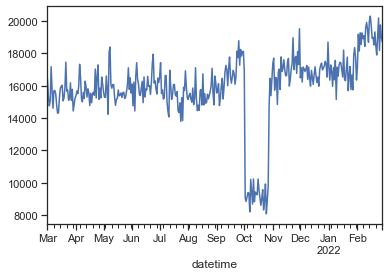

In [680]:
df_CA_by_date.plot(legend=False)